<a href="https://colab.research.google.com/github/sheershaagrawal/projectdatamites/blob/master/Portuguese_Bank_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip PRCP-1000-ProtugeseBank.zip



Archive:  PRCP-1000-ProtugeseBank.zip
  inflating: Data/bank-names.txt     
  inflating: Data/bank.csv           
  inflating: Data/bank-additional/bank-additional-names.txt  
  inflating: Data/bank-additional/bank-additional.csv  
  inflating: Data/bank-additional/bank-additional-full.csv  
  inflating: Data/bank-additional/.Rhistory  
  inflating: Data/bank-additional/.DS_Store  
  inflating: Data/bank-full.csv      


In [3]:
!ls PRCP-1000-ProtugeseBank/Data/bank-additional


ls: cannot access 'PRCP-1000-ProtugeseBank/Data/bank-additional': No such file or directory


In [4]:
!ls


Data  PRCP-1000-ProtugeseBank.zip  sample_data


In [5]:
!ls Data/bank-additional


bank-additional.csv  bank-additional-full.csv  bank-additional-names.txt


In [6]:
import pandas as pd

df = pd.read_csv(
    '/content/Data/bank-additional/bank-additional-full.csv',
    sep=';'
)

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape


(41188, 21)

In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [13]:
df.duplicated().sum()

np.int64(12)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


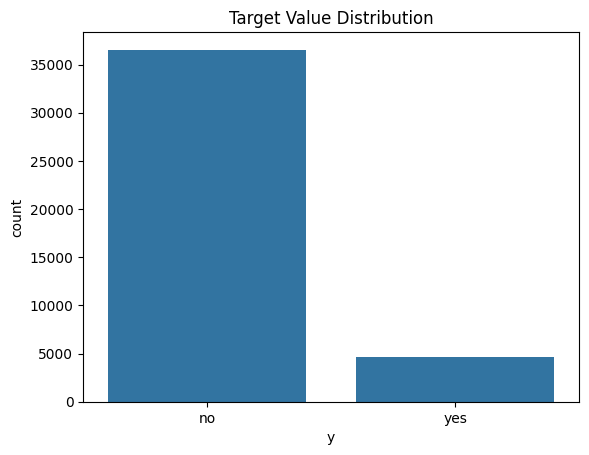

In [15]:
sns.countplot(x='y', data=df)
plt.title('Target Value Distribution')
plt.show()

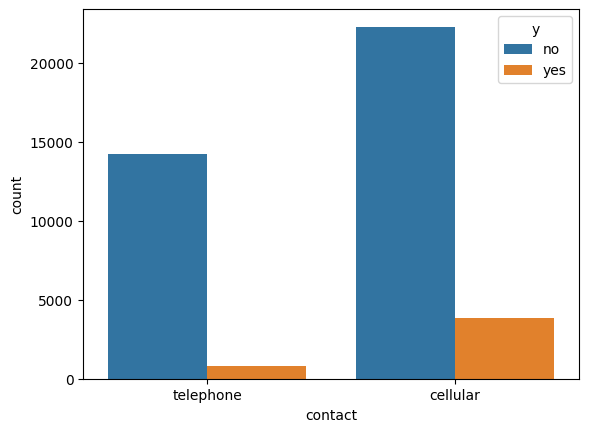

In [17]:
sns.countplot(x='contact', hue='y', data=df)
plt.show()

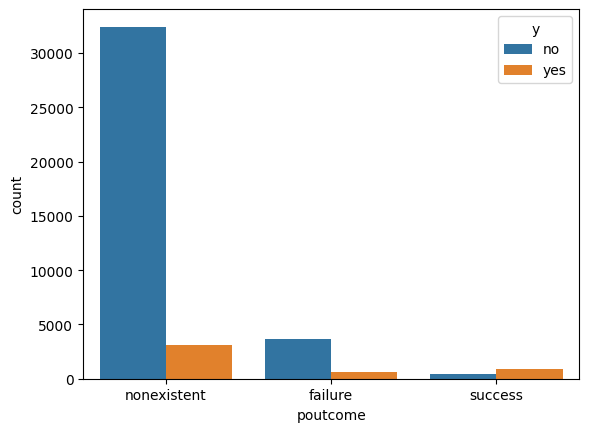

In [18]:
sns.countplot(x='poutcome', hue='y', data=df)
plt.show()


In [19]:
df.drop('duration', axis=1, inplace=True)


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [21]:
X = df.drop('y', axis=1)
y = df['y']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

results = {}

results['Logistic Regression'] = evaluate_model(LogisticRegression(max_iter=1000))
results['Decision Tree'] = evaluate_model(DecisionTreeClassifier())
results['Random Forest'] = evaluate_model(RandomForestClassifier(n_estimators=100))
results['Naive Bayes'] = evaluate_model(GaussianNB())

pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.900704,0.702206,0.205819,0.318333
Decision Tree,0.841345,0.312190,0.339440,0.325245
Random Forest,0.898519,0.594650,0.311422,0.408769
Naive Bayes,0.839767,0.354815,0.516164,0.420544
